# MRS spectral quality
SNR and peak linewidth dependances

In [1]:
# %% init
from IPython import get_ipython
import matplotlib.pylab as plt
import mrs.reco as reco
import mrs.log as log
import mrs.paths as default_paths
import numpy as np
import pickle
get_ipython().magic("clear")
plt.close("all")

get_ipython().magic("matplotlib notebook")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.max_open_warning'] = 1000
log.setLevel(log.DEBUG)

(DEBUG) Loaded backend nbAgg version unknown.


## open reconstructed data database file and print available datasets


In [2]:
with open(default_paths.DEFAULT_RECO_DATA_DB_FILE, 'rb') as f:
    [pkl_data_dict] = pickle.load(f)

patient_name_keys = list(pkl_data_dict.keys())
for pnk in patient_name_keys:
    # avoid DICOMs (no patient names!)
    if(pnk is not None):
        dataset_keys = list(pkl_data_dict[pnk].keys())
        print("> Patient name = " + pnk)
        for dk in dataset_keys:
            print(">> Dataset name = " + dk)
        

> Patient name = 296_YM_P1_BRAINMOELLE
>> Dataset name = #0 brain - sLASER R:N=25:1 (TWIX)
>> Dataset name = #1 brain - sLASER R:N=5:5 (TWIX)
>> Dataset name = #0 brain - sLASER no VAPOR + FID modulus
>> Dataset name = #2 comparing TWIX steam
>> Dataset name = #3 comparing TWIX sLASER R:N=20:1
> Patient name = 308_RS_P1_MOELLE
>> Dataset name = #0 brain - sLASER 20:1 resp trig (TWIX)
>> Dataset name = #1 sLASER 20:1 resp trig (TWIX)
> Patient name = 291_VS_MOELLE_SPECTRO_P1
>> Dataset name = #0 STEAM #1 (concatenated)
>> Dataset name = #0 sLASER #1 (concatenated)
>> Dataset name = #0 sLASER #2
> Patient name = 294_PM_P1_MOELLE
>> Dataset name = #2 sLASER R:N=25:1 (TWIX)
>> Dataset name = #3 sLASER R:N=25:1 trig (TWIX)
> Patient name = 307_AP_P1_MOELLE
>> Dataset name = #4 sLASER 20:1 cardiac trig (TWIX)
>> Dataset name = #5 sLASER 20:1 resp trig (TWIX)
>> Dataset name = #6 sLASER 20:1 no trig (TWIX)
>> Dataset name = #7 sLASER 10:1 repos. + resp trig (TWIX)
> Patient name = 310_MG_P1_M

## for each dataset, extract parameters:
SNR, linewidth, weight, height, Vref, LASER R/N if possible, TE

In [3]:
data_snr = []
data_lw = []
data_weight = []
data_height = []
data_vref = []
data_te = []
data_laser_r = []
data_laser_n = []
data_patient_name = []
data_dataset_name = []

patient_name_keys = list(pkl_data_dict.keys())
for pnk in patient_name_keys:
    # avoid DICOMs (no patient names!)
    if(pnk is not None):
        dataset_keys = list(pkl_data_dict[pnk].keys())
        print("> Patient name = " + pnk)
        for dk in dataset_keys:
            print(">> Dataset name = " + dk)
            p = pkl_data_dict[pnk][dk]["pipeline"]
            s = pkl_data_dict[pnk][dk]["data"]
            
            data_patient_name.append(pnk)
            data_dataset_name.append(dk)
            
            # get SNR/LWs from pipeline
            if(p.analyze_enable):
                data_labels = list(p._analyze_results_dict.keys())
                job_labels = list(p._analyze_results_dict[dk]["snr"].keys())
                last_job_key = job_labels[-1]
                data_snr.append(p._analyze_results_dict[dk]["snr"][last_job_key])
                data_lw.append(p._analyze_results_dict[dk]["lw"][last_job_key])
            else:
                data_snr.append(None)
                data_lw.append(None)
                
            # get patient stuff
            data_weight.append(pkl_data_dict[pnk][dk]["patient_weight"])
            data_height.append(pkl_data_dict[pnk][dk]["patient_height"])
            data_vref.append(pkl_data_dict[pnk][dk]["vref"])
            data_te.append(pkl_data_dict[pnk][dk]["te"])
            
            if("r" in pkl_data_dict[pnk][dk]):
                data_laser_r.append(pkl_data_dict[pnk][dk]["r"])
                data_laser_n.append(pkl_data_dict[pnk][dk]["n"])
            else:
                data_laser_r.append(None)
                data_laser_n.append(None)  

data_snr = np.array(data_snr)
data_lw = np.array(data_lw)
data_weight = np.array(data_weight)
data_height = np.array(data_height)
data_vref = np.array(data_vref)
data_te = np.array(data_te)
data_laser_r = np.array(data_laser_r)
data_laser_n = np.array(data_laser_n)
data_patient_name = np.array(data_patient_name)
data_dataset_name = np.array(data_dataset_name)
        
data_bmi = data_weight/data_height**2

> Patient name = 296_YM_P1_BRAINMOELLE
>> Dataset name = #0 brain - sLASER R:N=25:1 (TWIX)
>> Dataset name = #1 brain - sLASER R:N=5:5 (TWIX)
>> Dataset name = #0 brain - sLASER no VAPOR + FID modulus
>> Dataset name = #2 comparing TWIX steam
>> Dataset name = #3 comparing TWIX sLASER R:N=20:1
> Patient name = 308_RS_P1_MOELLE
>> Dataset name = #0 brain - sLASER 20:1 resp trig (TWIX)
>> Dataset name = #1 sLASER 20:1 resp trig (TWIX)
> Patient name = 291_VS_MOELLE_SPECTRO_P1
>> Dataset name = #0 STEAM #1 (concatenated)
>> Dataset name = #0 sLASER #1 (concatenated)
>> Dataset name = #0 sLASER #2
> Patient name = 294_PM_P1_MOELLE
>> Dataset name = #2 sLASER R:N=25:1 (TWIX)
>> Dataset name = #3 sLASER R:N=25:1 trig (TWIX)
> Patient name = 307_AP_P1_MOELLE
>> Dataset name = #4 sLASER 20:1 cardiac trig (TWIX)
>> Dataset name = #5 sLASER 20:1 resp trig (TWIX)
>> Dataset name = #6 sLASER 20:1 no trig (TWIX)
>> Dataset name = #7 sLASER 10:1 repos. + resp trig (TWIX)
> Patient name = 310_MG_P1_M

Excluding brain scans (SNR>150)

In [4]:
# filter out Nones
data_mask = (data_snr != np.array(None))
data_snr = data_snr[data_mask]
data_lw = data_lw[data_mask]
data_weight = data_weight[data_mask]
data_height = data_height[data_mask]
data_vref = data_vref[data_mask]
data_te = data_te[data_mask]
data_laser_r = data_laser_r[data_mask]
data_laser_n = data_laser_n[data_mask]
data_bmi = data_bmi[data_mask]
data_patient_name = data_patient_name[data_mask]
data_dataset_name = data_dataset_name[data_mask]

# keep a copy including brain data
data_snr_b = data_snr.copy()
data_lw_b = data_lw.copy()
data_weight_b = data_weight.copy()
data_height_b = data_height.copy()
data_vref_b = data_vref.copy()
data_te_b = data_te.copy()
data_laser_r_b = data_laser_r.copy()
data_laser_n_b = data_laser_n.copy()
data_bmi_b = data_bmi.copy()
data_patient_name_b = data_patient_name.copy()
data_dataset_name_b = data_dataset_name.copy()

# filter out brain data 
data_mask = (data_snr < 150)
data_snr = data_snr[data_mask]
data_lw = data_lw[data_mask]
data_weight = data_weight[data_mask]
data_height = data_height[data_mask]
data_vref = data_vref[data_mask]
data_te = data_te[data_mask]
data_laser_r = data_laser_r[data_mask]
data_laser_n = data_laser_n[data_mask]
data_bmi = data_bmi[data_mask]
data_patient_name = data_patient_name[data_mask]
data_dataset_name = data_dataset_name[data_mask]

(DEBUG) MRSData2.display_spectrum_1d: displaying [None]...
(DEBUG) MRSData2.display_spectrum_1d: displaying stuff!


<IPython.core.display.Javascript object>


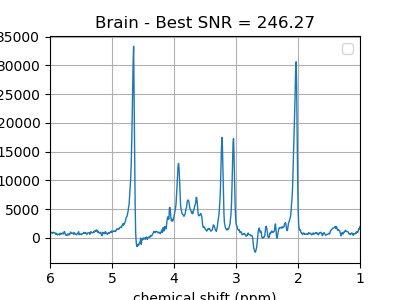

(WARNING) No handles with labels found to put in legend.
(DEBUG) MRSData2.display_spectrum_1d: displaying [None]...
(DEBUG) MRSData2.display_spectrum_1d: displaying stuff!


<IPython.core.display.Javascript object>


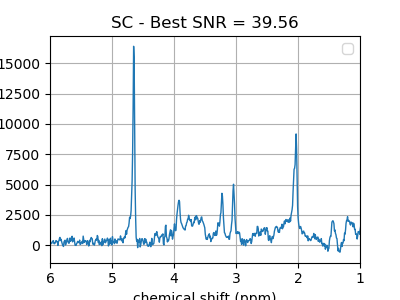

(WARNING) No handles with labels found to put in legend.
(DEBUG) MRSData2.display_spectrum_1d: displaying [None]...
(DEBUG) MRSData2.display_spectrum_1d: displaying stuff!


<IPython.core.display.Javascript object>


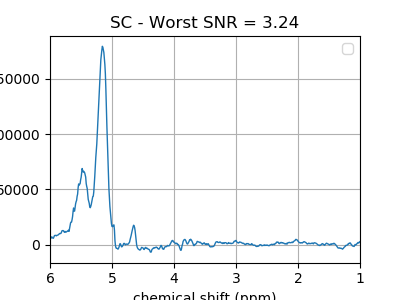

(WARNING) No handles with labels found to put in legend.


Text(0.5, 1.0, 'SC - Worst SNR = 3.24')

In [10]:
# finding best SNR spectrum in brain
i_snr_max = np.argmax(data_snr_b)
pnk = data_patient_name_b[i_snr_max]
dk = data_dataset_name_b[i_snr_max]
s = pkl_data_dict[pnk][dk]["data"]
s._dt = 1 / 10000
s._f0 = 300
s.ppm0 = 4.7
s.display_spectrum_1d(1)
plt.title("Brain - Best SNR = %.2f" % data_snr_b[i_snr_max])

# finding best SNR spectrum in sc
i_snr_max = np.argmax(data_snr)
pnk = data_patient_name[i_snr_max]
dk = data_dataset_name[i_snr_max]
s = pkl_data_dict[pnk][dk]["data"]
s._dt = 1 / 10000
s._f0 = 300
s.ppm0 = 4.7
s.display_spectrum_1d(2)
plt.title("SC - Best SNR = %.2f" % data_snr_b[i_snr_max])

# finding best SNR spectrum in sc
i_snr_min = np.argmin(data_snr)
pnk = data_patient_name[i_snr_min]
dk = data_dataset_name[i_snr_min]
s = pkl_data_dict[pnk][dk]["data"]
s._dt = 1 / 10000
s._f0 = 300
s.ppm0 = 4.7
s.display_spectrum_1d(3)
plt.title("SC - Worst SNR = %.2f" % data_snr[i_snr_min])


<IPython.core.display.Javascript object>


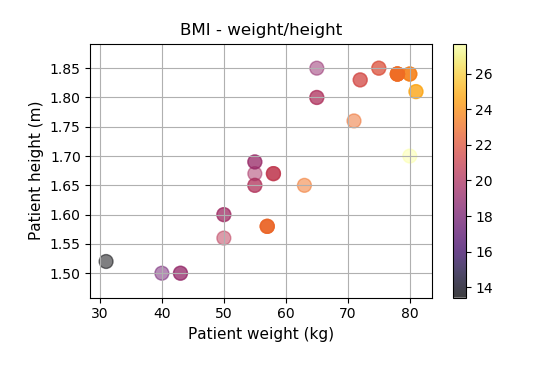

(DEBUG) locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6a7726d070>
(DEBUG) Using auto colorbar locator on colorbar
(DEBUG) locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6a7726d070>
(DEBUG) Setting pcolormesh


In [6]:
cm = plt.cm.get_cmap('inferno')
fig, ax = plt.subplots()
sc = ax.scatter(data_weight, data_height, c=data_bmi, s=100, alpha=0.5, cmap=cm)
ax.set_xlabel("Patient weight (kg)", fontsize=11)
ax.set_ylabel("Patient height (m)", fontsize=11)
ax.set_title("BMI - weight/height")
ax.grid(True)

plt.colorbar(sc)
fig.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


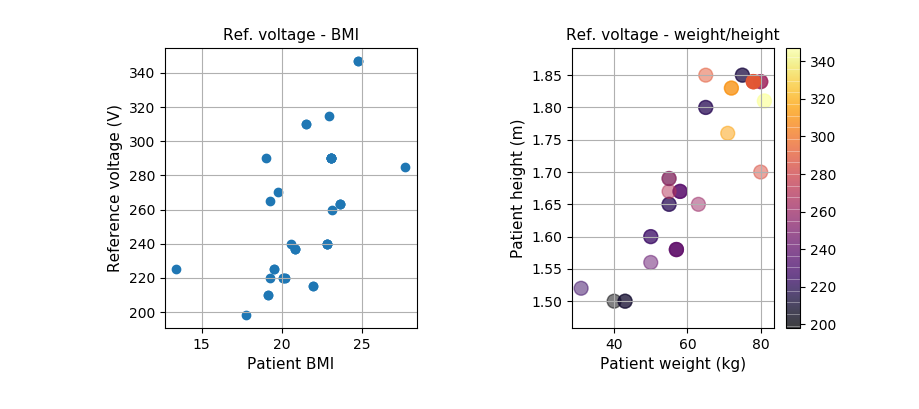

(DEBUG) locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6a7745ceb0>
(DEBUG) Using auto colorbar locator on colorbar
(DEBUG) locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6a7745ceb0>
(DEBUG) Setting pcolormesh


In [7]:
cm = plt.cm.get_cmap('inferno')
fig, ax = plt.subplots(1, 2)
sc = ax[0].scatter(data_bmi, data_vref)
ax[0].set_xlabel("Patient BMI", fontsize=11)
ax[0].set_ylabel("Reference voltage (V)", fontsize=11)
ax[0].set_title("Ref. voltage - BMI", fontsize=11)
ax[0].grid(True)

sc = ax[1].scatter(data_weight, data_height, c=data_vref, s=100, alpha=0.5, cmap=cm)
ax[1].set_xlabel("Patient weight (kg)", fontsize=11)
ax[1].set_ylabel("Patient height (m)", fontsize=11)
ax[1].set_title("Ref. voltage - weight/height", fontsize=11)
ax[1].grid(True)

plt.colorbar(sc)
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


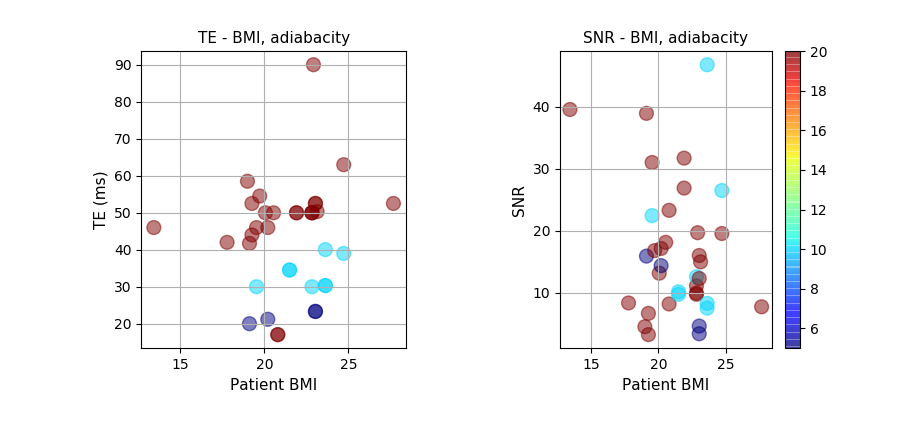

(DEBUG) locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6a773fb3d0>
(DEBUG) Using auto colorbar locator on colorbar
(DEBUG) locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6a773fb3d0>
(DEBUG) Setting pcolormesh


In [8]:
cm = plt.cm.get_cmap('jet')
fig, ax = plt.subplots(1, 2)
sc0 = ax[0].scatter(data_bmi, data_te, c=data_laser_r, s=100, alpha=0.5, cmap=cm)
ax[0].set_xlabel("Patient BMI", fontsize=11)
ax[0].set_ylabel("TE (ms)", fontsize=11)
ax[0].set_title("TE - BMI, adiabacity", fontsize=11)
ax[0].grid(True)

sc1 = ax[1].scatter(data_bmi, data_snr, c=data_laser_r, s=100, alpha=0.5, cmap=cm)
ax[1].set_xlabel("Patient BMI", fontsize=11)
ax[1].set_ylabel("SNR", fontsize=11)
ax[1].set_title("SNR - BMI, adiabacity", fontsize=11)
ax[1].grid(True)

plt.colorbar(sc1)
fig.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


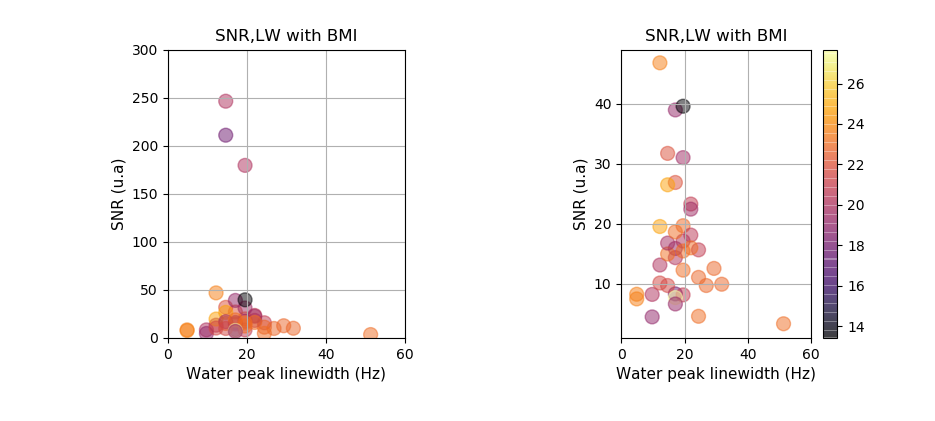

(DEBUG) locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6a77a76430>
(DEBUG) Using auto colorbar locator on colorbar
(DEBUG) locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f6a77a76430>
(DEBUG) Setting pcolormesh


In [9]:
cm = plt.cm.get_cmap('inferno')
fig, ax = plt.subplots(1, 2)
sc0 = ax[0].scatter(data_lw_b, data_snr_b, c=data_bmi_b, s=100, alpha=0.5, cmap=cm)
ax[0].set_xlabel("Water peak linewidth (Hz)", fontsize=11)
ax[0].set_ylabel("SNR (u.a)", fontsize=11)
ax[0].set_title("SNR,LW with BMI")
ax[0].set_xlim([0, 60])
ax[0].set_ylim([0, 300])
ax[0].grid(True)

sc1 = ax[1].scatter(data_lw, data_snr, c=data_bmi, s=100, alpha=0.5, cmap=cm)
ax[1].set_xlabel("Water peak linewidth (Hz)", fontsize=11)
ax[1].set_ylabel("SNR (u.a)", fontsize=11)
ax[1].set_title("SNR,LW with BMI")
ax[1].set_xlim([0, 60])
ax[1].grid(True)

plt.colorbar(sc1)
fig.tight_layout()
plt.show()